<a href="https://colab.research.google.com/github/jessika2018/Data-analysis-Master---ashrafieh-sales/blob/main/ecommercedataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
dat = pd.read_csv('/content/Year 2019-2020.csv',encoding="ISO-8859-1")
# ,encoding='cp874'

In [7]:
dat.head(5)
dff = dat.copy()
dat.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,000000PD02000660322,104873,NESCAFE 3IN1 CLASSIC BAG,12,4/26/2020 8:05,6.95,13085.0,Ashrafieh
1,000000PD02000660322,104874,GANDOUR UNICA,12,11/16/2019 9:27,6.75,13085.0,Ashrafieh
2,000000PD02000660322,135173,CAKE PLAIN,12,5/4/2019 8:09,6.75,13085.0,Dbayeh
3,000000PD02000660322,479487,CROISSANT CHESSECAKE,48,11/9/2019 9:46,2.10,13085.0,Ashrafieh
4,000000PD02000660322,488316,BLUE COMPACT BOX SHORT,24,7/21/2019 8:15,1.25,13085.0,Hamra
5,000000PD02000660323,123764,COFFEE GOURMET VAC,24,5/27/2019 8:08,1.65,13085.0,Hamra
6,000000PD02000660323,147320,TAHINEH,24,10/8/2019 8:18,1.25,13085.0,Hamra
7,000000PD02000660323,266717,CLASSIC ALUMINUM,10,11/17/2019 8:47,5.95,13085.0,Ashrafieh
8,000000PD02000660323,358539,DANISH BUTTER -10%,12,5/11/2019 9:09,2.55,13085.0,Ashrafieh
9,000000PD02000660323,393636,PIN ARABE BLE COMPLET SANS SEL,12,6/27/2019 8:40,3.75,13085.0,Hamra


In [8]:
dat.head(5)
dff = dat.copy()
dat.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,000000PD02000660322,104873,NESCAFE 3IN1 CLASSIC BAG,12,4/26/2020 8:05,6.95,13085.0,Ashrafieh
1,000000PD02000660322,104874,GANDOUR UNICA,12,11/16/2019 9:27,6.75,13085.0,Ashrafieh
2,000000PD02000660322,135173,CAKE PLAIN,12,5/4/2019 8:09,6.75,13085.0,Dbayeh
3,000000PD02000660322,479487,CROISSANT CHESSECAKE,48,11/9/2019 9:46,2.10,13085.0,Ashrafieh
4,000000PD02000660322,488316,BLUE COMPACT BOX SHORT,24,7/21/2019 8:15,1.25,13085.0,Hamra
5,000000PD02000660323,123764,COFFEE GOURMET VAC,24,5/27/2019 8:08,1.65,13085.0,Hamra
6,000000PD02000660323,147320,TAHINEH,24,10/8/2019 8:18,1.25,13085.0,Hamra
7,000000PD02000660323,266717,CLASSIC ALUMINUM,10,11/17/2019 8:47,5.95,13085.0,Ashrafieh
8,000000PD02000660323,358539,DANISH BUTTER -10%,12,5/11/2019 9:09,2.55,13085.0,Ashrafieh
9,000000PD02000660323,393636,PIN ARABE BLE COMPLET SANS SEL,12,6/27/2019 8:40,3.75,13085.0,Hamra


In [9]:
duplicated = dff.duplicated().sum()
print(duplicated)
dff.drop_duplicates(inplace= True)

0


In [10]:
dff.shape

(278545, 8)

In [11]:
#transfore the data type
dff['InvoiceDate']= pd.to_datetime(dff['InvoiceDate'])

In [12]:
dff.describe()

,StockCode,Quantity,Price,Customer ID
count,278545.000000,278545.000000,278545.000000,218427.000000
mean,315016.911749,10.576524,4.644153,15340.280002
std,135705.099537,113.030279,163.039689,1681.284323
min,100366.000000,-9200.000000,-53594.360000,12346.000000
25%,165329.000000,1.000000,1.250000,13975.000000
50%,335406.000000,3.000000,2.100000,15255.000000
75%,436335.000000,10.000000,4.250000,16814.000000
max,511870.000000,19152.000000,25111.090000,18287.000000


In [13]:
#deleting negative values from unit price and quantity
#we have negtive value for quantity and price
df = dff[(dff['Quantity']>0) & (dff['Price']>0)]

In [14]:
df.shape
df.describe()

,StockCode,Quantity,Price,Customer ID
count,270163.000000,270163.000000,270163.000000,212679.000000
mean,315033.384201,11.564011,4.382925,15348.725116
std,135734.159352,98.622004,69.580093,1680.690644
min,100366.000000,1.000000,0.001000,12346.000000
25%,165329.000000,1.000000,1.250000,13979.000000
50%,335411.000000,3.000000,2.100000,15270.000000
75%,436384.000000,10.000000,4.250000,16823.000000
max,511870.000000,19152.000000,25111.090000,18287.000000


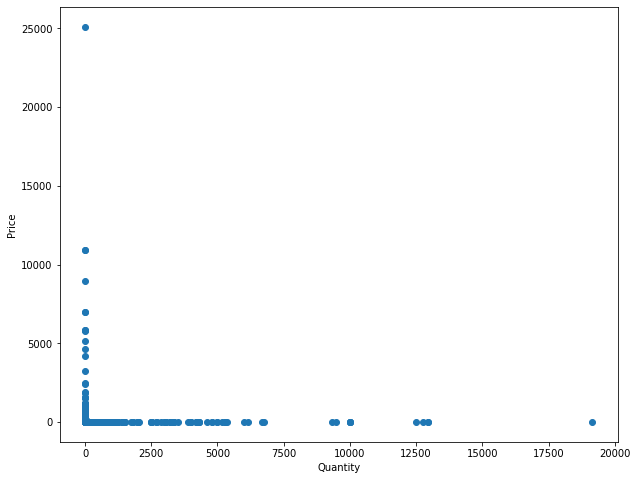

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['Quantity'], df['Price'])
ax.set_xlabel('Quantity')
ax.set_ylabel('Price')
plt.show()

### Relation of unit price with quantity

In [17]:
#Taking out outliers to get better plot
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['Quantity','Price']]))
df = df[(z < 3).all(axis=1)]

In [18]:
df = df[(df['Quantity']>=0) | (df['Price']>=0)]

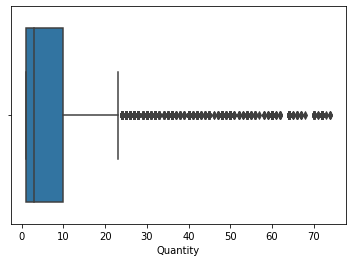

In [19]:
sns.boxplot(df['Quantity'])

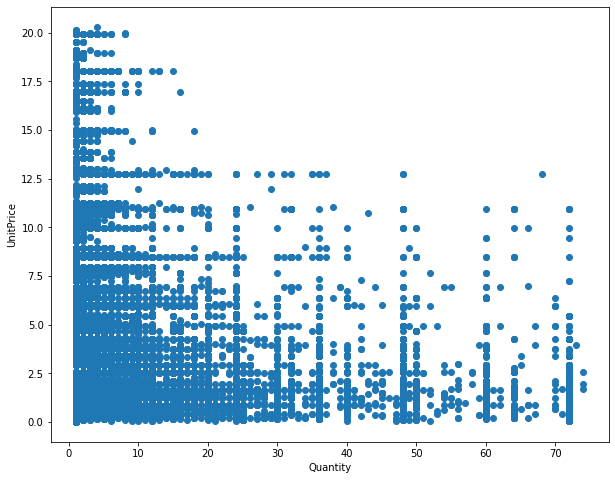

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['Quantity'], df['Price'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()

In [21]:
#Checking the missings
df.isna().sum()

Invoice            0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
Price              0
Customer ID    55286
Country            0
dtype: int64

In [22]:
#Creating total amount column
df['TotalAmount'] = df['Quantity'] * df['Price']


In [23]:
df['Hour']=df['InvoiceDate'].dt.hour
df['Month']=df['InvoiceDate'].dt.month
df['Weekdays']= df['InvoiceDate'].dt.weekday

### RFM SEGMENTATION

In [24]:
rfm = df.copy()

In [25]:
#because we are looking at the customer and not the product we drop InvoiceNo and Stcokcode
ab = df.groupby('Customer ID').agg({'InvoiceDate': 'min','TotalAmount': 'sum'})
ab.rename(columns={'InvoiceDate': "Recency",('InvoiceDate', 'nunique'): "Frequency","TotalAmount": 'Monetization'},  inplace = True)
frequency = df.groupby('Customer ID').agg({'InvoiceDate':'nunique'})
frequency.rename(columns={'InvoiceDate': "Frequency"}, inplace = True)

rfm = pd.merge(ab,frequency, on='Customer ID')

#rfm.rename(columns={('InvoiceDate',     'min'): "Recency",('InvoiceDate', 'nunique'): "Frequency","TotalAmount": 'Monetization'})

In [26]:
a = rfm.reset_index()

In [27]:
rfm.rename(columns={'InvoiceDate': "Recency",'InvoiceDate': "Frequency","TotalAmount": 'Monetization'})

,Recency,Monetization,Frequency
Customer ID,,,
12346.0,2019-05-13 08:20:00,372.86,33
12349.0,2019-05-04 08:13:00,928.72,45
12355.0,2019-05-05 08:46:00,488.21,22
12358.0,2019-05-09 08:15:00,1697.93,35
12359.0,2019-05-04 09:11:00,1776.13,83
...,...,...,...
18281.0,2019-10-27 08:30:00,120.32,10
18283.0,2019-05-02 08:05:00,354.42,132
18285.0,2019-05-22 08:44:00,173.00,10


In [28]:
rfm.describe()

,Monetization,Frequency
count,3027.000000,3027.000000
mean,1136.604632,68.192270
std,2532.977733,133.712346
min,1.300000,1.000000
25%,240.325000,16.000000
50%,522.870000,34.000000
75%,1198.075000,74.000000
max,65563.890000,3095.000000


In [29]:
#We save the most recent date to, then , calulate the recency
e = df['InvoiceDate'].min()
print('minimun :'+ str(e))

minimun :2019-05-01 08:00:00


In [30]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3027 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Recency       3027 non-null   datetime64[ns]
 1   Monetization  3027 non-null   float64       
 2   Frequency     3027 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 94.6 KB


In [31]:
###create receny, cad calculate the last time he bought something compare to e
rfm['Recency'] = rfm['Recency'].apply(lambda x : (x - e).days)

rfm['BasketSize'] = (rfm['Monetization']/rfm['Frequency']).round(2)

In [32]:
rfm.describe()

,Recency,Monetization,Frequency
count,3027.000000,3027.000000,3027.000000
mean,22.097126,1136.604632,68.192270
std,45.761637,2532.977733,133.712346
min,0.000000,1.300000,1.000000
25%,2.000000,240.325000,16.000000
50%,7.000000,522.870000,34.000000
75%,21.000000,1198.075000,74.000000
max,395.000000,65563.890000,3095.000000


In [33]:
rfm1 = rfm.copy()
# df.groupby('CustomerID')['InvoiceDate'].max() - df.groupby('CustomerID')['InvoiceDate'].min()
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount,Hour,Month,Weekdays
0,000000PD02000660322,104873,NESCAFE 3IN1 CLASSIC BAG,12,2020-04-26 08:05:00,6.95,13085.0,Ashrafieh,83.40,8,4,6
1,000000PD02000660322,104874,GANDOUR UNICA,12,2019-11-16 09:27:00,6.75,13085.0,Ashrafieh,81.00,9,11,5
2,000000PD02000660322,135173,CAKE PLAIN,12,2019-05-04 08:09:00,6.75,13085.0,Dbayeh,81.00,8,5,5
3,000000PD02000660322,479487,CROISSANT CHESSECAKE,48,2019-11-09 09:46:00,2.10,13085.0,Ashrafieh,100.80,9,11,5
4,000000PD02000660322,488316,BLUE COMPACT BOX SHORT,24,2019-07-21 08:15:00,1.25,13085.0,Hamra,30.00,8,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
278540,000000PD03000770721,142839,LABNEH BALADI,2,2019-11-28 09:33:00,0.65,14535.0,Ashrafieh,1.30,9,11,3
278541,000000PD03000770721,336923,KIRI SNOW SPREAD,5,2019-12-21 08:34:00,0.85,14535.0,Hamra,4.25,8,12,5
278542,000000PD03000770721,440233,"TANNOUR BREAD SMALL 5""S",1,2020-01-10 09:47:00,1.65,14535.0,Dbayeh,1.65,9,1,4
278543,000000PD03000770721,175191,PAIN AU LAIT,2,2019-05-29 08:28:00,1.65,14535.0,Ashrafieh,3.30,8,5,2


In [34]:
#why do we rank it and how?
rfm['Rank_Recency'] = pd.qcut( rfm['Recency'],q=5, labels = range(6, 1, -1))
rfm['Rank_Recency'] = pd.to_numeric(rfm['Rank_Recency'])

In [35]:
def freq(x):
    if x ==1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x == 4:
        return 4
    else: 
        return 5

rfm['Rank_Frequency'] =rfm['Frequency'].apply(freq)

#rfm['Rank_Frequency'] = pd.qcut( rfm['Frequency'],q=5, labels = range(1, 6, 1))
#rfm['Rank_Frequency'] = pd.to_numeric(rfm['Rank_Frequency'])


In [36]:
rfm['Rank_Monetization'] = pd.qcut( rfm['Monetization'],q=5, labels = range(1, 6, 1))
rfm['Rank_Monetization'] = pd.to_numeric(rfm['Rank_Monetization'])

rfm['RFM_Score'] = rfm['Rank_Recency'].astype(str)+ rfm['Rank_Frequency'].astype(str) + rfm['Rank_Monetization'].astype(str)
rfm['Score'] = rfm['Rank_Recency']+ rfm['Rank_Frequency']+ rfm['Rank_Monetization']

rfm['BasketSize'] = (rfm['Monetization']/rfm['Frequency']).round(2)

In [37]:
rfm.describe()

,Recency,Monetization,Frequency,Rank_Recency,Rank_Frequency,Rank_Monetization,Score
count,3027.000000,3027.000000,3027.000000,3027.000000,3027.000000,3027.000000,3027.000000
mean,22.097126,1136.604632,68.192270,4.052197,4.839445,3.000000,11.891642
std,45.761637,2532.977733,133.712346,1.416520,0.683574,1.414914,2.797439
min,0.000000,1.300000,1.000000,2.000000,1.000000,1.000000,4.000000
25%,2.000000,240.325000,16.000000,3.000000,5.000000,2.000000,10.000000
50%,7.000000,522.870000,34.000000,4.000000,5.000000,3.000000,12.000000
75%,21.000000,1198.075000,74.000000,5.000000,5.000000,4.000000,14.000000
max,395.000000,65563.890000,3095.000000,6.000000,5.000000,5.000000,16.000000


In [38]:
def client_segment(x):
    if x == 15:
        return 'Champions'
    elif  x >= 14:
        return 'Loyal Customers'
    elif  x >= 11:
        return 'Can’t Lose Them'
    elif  x >= 9:
        return 'Potential Loyalist'
    elif  x >= 7:
        return 'Promising'
    elif  x >= 6:
        return 'Needs Attention'
    elif  x >= 5:
        return 'At Risk'
    else:
        return 'Lost'

In [39]:
rfm['Clients'] = rfm['Score'].apply(client_segment)

In [40]:
clients = rfm[['Clients', 'Frequency', 'Monetization', 'Recency']].groupby('Clients').median()
clients.reset_index(inplace = True)

In [41]:
rfm.head(5)

,Recency,Monetization,Frequency,Rank_Recency,Rank_Frequency,Rank_Monetization,RFM_Score,Score,Clients
Customer ID,,,,,,,,,
12346.0,12,372.86,33,3,5,3,353,11,Can’t Lose Them
12349.0,3,928.72,45,5,5,4,554,14,Loyal Customers
12355.0,4,488.21,22,5,5,3,553,13,Can’t Lose Them
12358.0,8,1697.93,35,4,5,5,455,14,Loyal Customers
12359.0,3,1776.13,83,5,5,5,555,15,Champions


Text(0.5, 1.0, 'Median Visits')

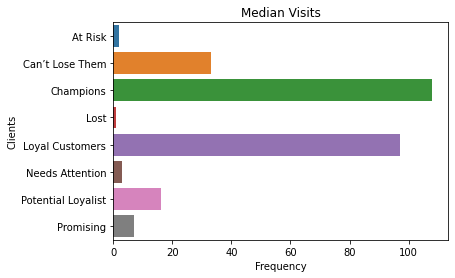

In [42]:
ax = sns.barplot(x="Frequency", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median Visits')

Text(0.5, 1.0, 'Median Expenditure')

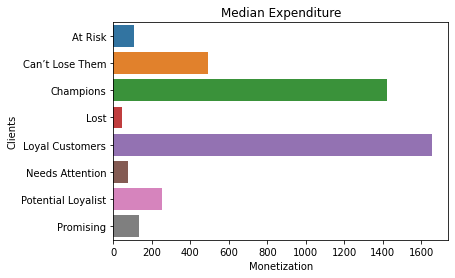

In [43]:
ax = sns.barplot(x="Monetization", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median Expenditure')

Text(0.5, 1.0, 'Median time from last shop ')

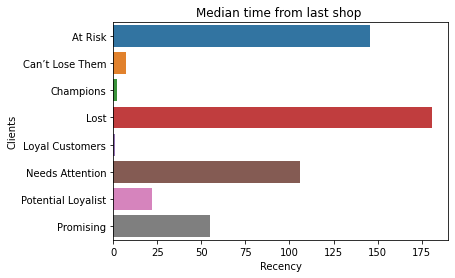

In [44]:
ax = sns.barplot(x="Recency", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median time from last shop ')


In [47]:
!pip install squarify

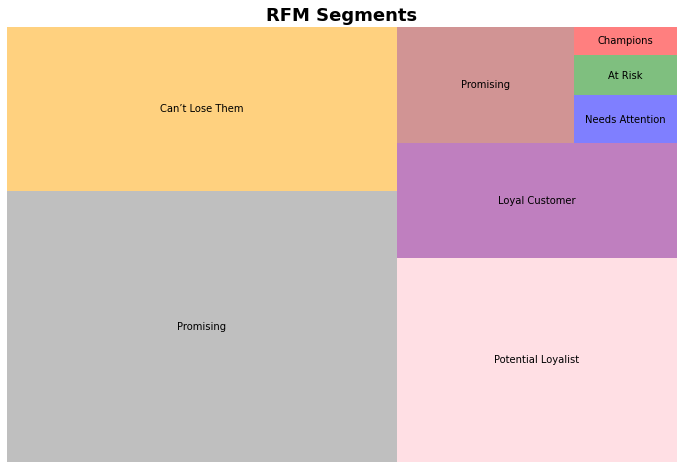

In [48]:
import squarify

squarity =rfm['Clients'] .value_counts()
color=['grey','orange','pink','purple', 'brown', 'blue', 'green', 'red']


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
squarify.plot(sizes= squarity , 
              label=['Promising',
                     'Can’t Lose Them',
                     'Potential Loyalist',
                     'Loyal Customer',
                     'Promising', 
                     'Needs Attention',
                     'At Risk',
                     'Champions',
                     'Lost',] ,color = color, alpha=0.5,)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [49]:
squarity

Can’t Lose Them       1097
Loyal Customers        663
Potential Loyalist     595
Champions              333
Promising              215
Lost                    51
Needs Attention         43
At Risk                 30
Name: Clients, dtype: int64

Interpretation

We have a deeper understanding of our segmentations from the graphs above, from the median expenditure to each group's number. Among the visualization, we observe three horizontal histograms (median frequency, median monetization and median recency for every group of clients) and one squarity.

As we can see in the Median Expenditure graph, our two best categories of clients are champions (in green) and loyal customer(in purple). As we can see, both clients provide almost 80% of our revenue and only represent 22% of our total clients! This follows the 80/20 rule, also known as the Pareto Principle, attributed to the Italian economist Vilfredo Pareto. In one of his papers, Pareto noted that about 80% of Italy's land belonged to approximately 20% of its total population.

This is a presentation of the three different users:

Champions gather 300 customer who has a median expenditure of $2446 and comes almost every month. For marketers, they should be the most critical clients because they make your market sustainable. In this case, you must regularly reward with the promotion or provide to them privilege access.

Potential Loyalist represents 15% of our customers. They play an essential role in the growth of the market. They already show interest in the brand. The next step is to acquire them by building a relationship.

Customers that need attention constitutes 10% of our market. They spend and come below the average. We translated this with a potential loss, increased churn. It is vital to reactive interest with discounts and recommendations. Moreover, you may also receive feedback to improve your process.

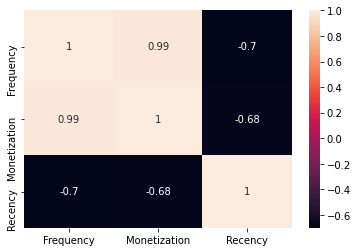

In [50]:
sns.heatmap(clients.corr(),annot=True)

In [51]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = clients.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Frequency,Monetization,Recency
Frequency,1.00,0.99,-0.70
Monetization,0.99,1.00,-0.68
Recency,-0.70,-0.68,1.00


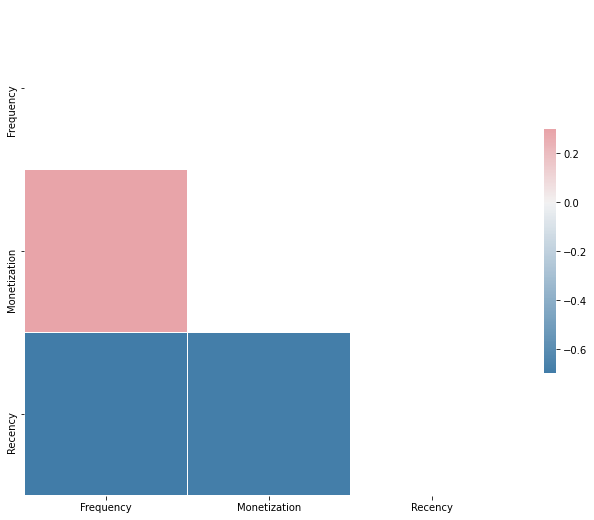

In [52]:
# Compute the correlation matrix
corr = clients.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

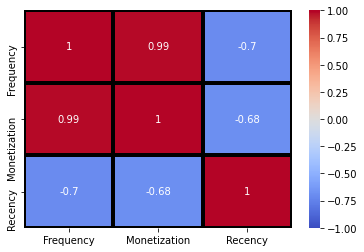

In [53]:
# sns.heatmap(clients.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
sns.heatmap(clients.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


In [54]:
clients

,Clients,Frequency,Monetization,Recency
0,At Risk,2.0,109.56,145.5
1,Can’t Lose Them,33.0,489.51,7.0
2,Champions,108.0,1421.42,2.0
3,Lost,1.0,45.00,181.0
4,Loyal Customers,97.0,1656.26,1.0
5,Needs Attention,3.0,77.25,106.0
6,Potential Loyalist,16.0,252.59,22.0
7,Promising,7.0,134.40,55.0


In [55]:
rfm['Clients'].value_counts()

Can’t Lose Them       1097
Loyal Customers        663
Potential Loyalist     595
Champions              333
Promising              215
Lost                    51
Needs Attention         43
At Risk                 30
Name: Clients, dtype: int64

CLUSTER

Unsupervised is a type of machine learning that concludes from a data set without a target variable. We usually implement this method to find a hidden pattern or understand the structure of the data. It discovers information that may not be visible to the human eye. The most popular method is clustering.

Clustering split your data set into several groups. The group are formed of similar data point compared to the other group. We can use this approach for marketing segmentation, medical imaging, and anomaly detection. They are different types of clustering methods, including:
Partitioning methods
Hierarchical clustering
Fuzzy clustering
Density-based clustering
Model-based clustering
Analogy:

You had a box of apples of different colors; red, green, and mixed colors. Individually picking each color would not only consume time but is likely to entail manifestations of human error. However, with cluster analysis, we can segment these different apples according to color. With such information, one can harvest information such as how many apples belong to which color, which color is of the best quality, or which color has the least quality.

In [56]:
cluster = rfm.drop(['Rank_Recency','Rank_Frequency','Rank_Monetization','RFM_Score','Score','Clients'], axis = 1)

K-means clustering algorithm
K-means is one of the most straightforward clustering analysis to implement. It attempts to divide the dataset into a fixed number k of a group. The k refers to the number of centroids you want in your model. A centroid is a point at the center of each cluster. The algorithm then allocates every data point to the nearest cluster while keeping it as small as possible.

The appropriate number of clusters is essential for an optimal score. In marketing, a wrong evaluation of it can result in a poor marketing campaign. For example, If you have five kinds of customers, but you only allow them to be segmented into two groups. Your campaign will not target the right audience, which is translated into a low return on investment (ROI)

### Finding Optimal number of clusters

In [57]:
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [58]:
X= MinMaxScaler().fit_transform(cluster)
#x = StandardScaler().fit_transform(X)

In [59]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

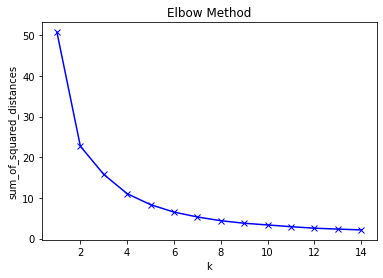

In [60]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

In [67]:
# !pip install sklearn --upgrade

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe74c9ea310>,
                 k=None, metric=None, model=None, timings=True)


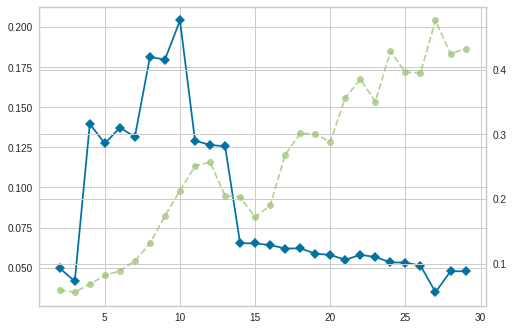

In [66]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer
print(visualizer)       # Finalize and render figure

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe74c86b550>,
                 k=None, metric=None, model=None, timings=True)


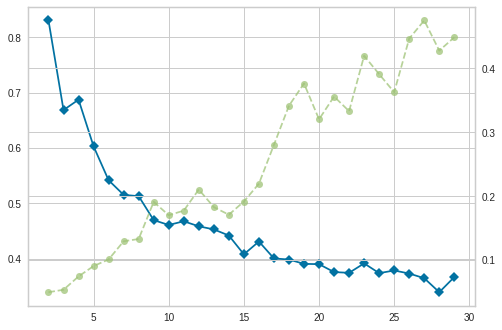

In [69]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
print(visualizer)  # Finalize and render the figure

In [80]:
# # Calinski Harabasz Score for K means
# # Import ElbowVisualizer
# from yellowbrick.cluster import KElbowVisualizer
# model = KMeans()
# # k is range of number of clusters.
# visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
# visualizer.fit(X)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [81]:
k_means_5 = KMeans(n_clusters=7)
model = k_means_5.fit(X)
y_hat_5 = k_means_5.predict(X)
labels_5 = k_means_5.labels_
print(metrics.silhouette_score(X, labels_5, metric = 'euclidean'))
metrics.calinski_harabasz_score(X, labels_5)

0.5154860731802174


4318.917482511224

In [82]:
cluster['Cluster'] = labels_5

In [83]:
temp = cluster.reset_index()
print(temp.shape)
# temp.join(dff,on='CustomerID',how='right',lsuffix='left',rsuffix='right')
# pd.concat([dff,temp],join='inner',axis=1)
dff.columns
dff1 = dff.drop(columns=['Invoice', 'StockCode','InvoiceDate'])
print(dff1.shape)
# dff1.join(temp,on='CustomerID',how='left',lsuffix='left',rsuffix='right')

(3027, 5)
(278545, 5)


In [84]:
dff1['Customer ID'] = dff1['Customer ID'].astype(str)
temp['Customer ID'] = temp['Customer ID'].astype(str)
print(dff1.dtypes)
print(temp.dtypes)

Description     object
Quantity         int64
Price          float64
Customer ID     object
Country         object
dtype: object
Customer ID      object
Recency           int64
Monetization    float64
Frequency         int64
Cluster           int32
dtype: object


### Building classification model to predict customer group

In [85]:
# temp.join(dff1,on='CustomerID',how='right',lsuffix='left',rsuffix='right')
temp1 = temp.merge(dff1,how='inner',left_on='Customer ID',right_on='Customer ID')
print(temp1.columns)
temp2 = temp1.drop(columns=['Recency', 'Monetization', 'Frequency'])

Index(['Customer ID', 'Recency', 'Monetization', 'Frequency', 'Cluster',
       'Description', 'Quantity', 'Price', 'Country'],
      dtype='object')


In [86]:
temp2
train = temp2.loc[:,temp2.columns != 'Cluster']
target = temp2.loc[:,temp2.columns == 'Cluster']
print(train.shape)
print(target.shape)

(217987, 5)
(217987, 1)


In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['DescriptionCode'] = le.fit_transform(train['Description'])
train['CountryCode'] = le.fit_transform(train['Country'])
train
# train1 = train[['Description','Country']].apply(le.fit_transform)

,Customer ID,Description,Quantity,Price,Country,DescriptionCode,CountryCode
0,12346.0,TAHINA PET -15%,10,4.50,Hamra,9249,2
1,12346.0,SUNFLOWER OIL,5,4.50,Ashrafieh,9103,0
2,12346.0,AYRAN LABAN,5,4.50,Hamra,841,2
3,12346.0,MAGGI CHICKEN LOW SALT,5,4.50,Dbayeh,5823,1
4,12346.0,SOFT WET WIPES,1,1.00,Ashrafieh,8758,0
...,...,...,...,...,...,...,...
217982,18287.0,DANISH BUTTER SOFT SALTED,16,0.85,Ashrafieh,3157,0
217983,18287.0,TARAMA,6,2.95,Ashrafieh,9279,0
217984,18287.0,HALLOUM VAC,8,1.65,Hamra,4671,2
217985,18287.0,ROUND CHEESE,12,1.45,Hamra,8079,2


In [88]:
temptrain = train.drop(columns=['Description','Customer ID','Country'])

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# train[['Quantity1','UnitPrice1']] = scaler.fit_transform(train[['Quantity','UnitPrice']])
scaler.fit(train[['Price','Quantity']])
scaled_data = pd.DataFrame(scaler.transform(train[['Price','Quantity']]),columns=['QuantScaled','UnitPriceScaled'])
train1 = pd.concat([train,scaled_data],axis=1)
train2 = train1.drop(columns=['Description','Quantity','Price','Country'])
train3 = train2.drop(columns=['Customer ID'])
train3

,DescriptionCode,CountryCode,QuantScaled,UnitPriceScaled
0,9249,2,0.029526,-0.028499
1,9103,0,0.029526,-0.080244
2,841,2,0.029526,-0.080244
3,5823,1,0.029526,-0.080244
4,8758,0,-0.073644,-0.121640
...,...,...,...,...
217982,3157,0,-0.078066,0.033596
217983,9279,0,-0.016164,-0.069895
217984,4671,2,-0.054484,-0.049197
217985,8079,2,-0.060380,-0.007800


In [90]:
train3
# train4.drop( )

,DescriptionCode,CountryCode,QuantScaled,UnitPriceScaled
0,9249,2,0.029526,-0.028499
1,9103,0,0.029526,-0.080244
2,841,2,0.029526,-0.080244
3,5823,1,0.029526,-0.080244
4,8758,0,-0.073644,-0.121640
...,...,...,...,...
217982,3157,0,-0.078066,0.033596
217983,9279,0,-0.016164,-0.069895
217984,4671,2,-0.054484,-0.049197
217985,8079,2,-0.060380,-0.007800


In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temptrain,target,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(174389, 4)
(174389, 1)
(43598, 4)
(43598, 1)


In [92]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
prediction = clf.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_train,y_pred=prediction))

In [ ]:
import nltk, warnings
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', 100)
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")

In [ ]:
df_cleaned = dff.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

In [ ]:
entry_to_remove = [] ; doubtfull_entry = []

In [ ]:
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

In [ ]:
df_cleaned.drop(remaining_entries.index, axis = 0, inplace = True)

In [ ]:
# list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
# list_special_codes

In [ ]:
# list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
# list_special_codes

In [ ]:
df_cleaned[(df_cleaned['Price'] == 0)].head(5)
df_cleaned['TotalPrice'] = df_cleaned['Price'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])

In [ ]:
uk_ecom = df_cleaned[df_cleaned['Country']=='Ashrafieh']
uk_ecom['Description'] = uk_ecom['Description'].astype(str)
freq = pd.Series(' '.join(uk_ecom['Description']).split()).value_counts()[:20]
freq

In [ ]:
#Uncommon items
freq1 =  pd.Series(' '.join(uk_ecom['Description']).split()).value_counts()[-20:]
freq1

In [ ]:
stop_words = set(stopwords.words("english"))
new_words = ['RED','PINK', 'BLUE', 'OF', 'BROWN',"BLACK"]
stop_words = stop_words.union(new_words)

In [ ]:
for i in new_words:
  if i in stop_words:
    print(i)

In [ ]:
import re
import nltk.corpus
from nltk import corpus

In [ ]:
corpus = []

In [ ]:
for i in range(0, 8789):
    text = re.sub('[^a-zA-Z]', ' ', uk_ecom['Description'].iloc[i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    ps=PorterStemmer()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if word not in stop_words]
    text = " ".join(text)
    i
    corpus.append(text)

In [ ]:
corpus

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(    background_color='white',
                          stopwords=stop_words,
                          max_words=200,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Customer\'s Products')

### Cohort Analysis

In [ ]:
import datetime as dt

In [ ]:
def extract_days(x):
	return dt.datetime(x.year, x.month, x.day)

In [ ]:
uk_ecom['date'] = pd.DatetimeIndex(uk_ecom['InvoiceDate']).date
uk_ecom['InvoiceDay'] = uk_ecom['date'].apply(extract_days)
grouping = uk_ecom.groupby('Customer ID')['InvoiceDay']
uk_ecom['CohortDay'] = grouping.transform('min')
print(uk_ecom.head())

In [ ]:
def extract_month_int(x):
    return dt.datetime(x.year, x.month, 1)


In [ ]:
#create invoice month column
uk_ecom['InvoiceMonth'] = uk_ecom['date'].apply(extract_month_int)
grouping = uk_ecom.groupby('Customer ID')['InvoiceMonth']
uk_ecom['CohortMonth'] = grouping.transform('min')
uk_ecom.head()

In [ ]:
def extract_dates_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [ ]:
invoice_year, invoice_month, _ = extract_dates_int(uk_ecom, 'InvoiceMonth')
cohort_year, cohort_month, _ = extract_dates_int(uk_ecom, 'CohortMonth')
years_difference = invoice_year - cohort_year
months_difference = invoice_month - cohort_month


In [ ]:
uk_ecom['CohortIndex'] = years_difference * 12 + months_difference + 1
grouping = uk_ecom.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique).reset_index()

In [ ]:
cohort_counts = cohort_data.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'Customer ID')
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis = 0)

In [ ]:
#review the retention table
retention.round(3) * 100
grouping_avg_quantity = uk_ecom.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_avg_quantity = grouping_avg_quantity['Quantity'].mean().reset_index()
average_quantity = cohort_data_avg_quantity.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'Quantity')
average_quantity.round(1).fillna('')

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('Retention Rate for Customers in United Kingdom')
sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin = 0.01, vmax = 0.5, cmap = 'BuGn')
plt.show()

## Assosiation Rules(Market Basket Analysis)

In [ ]:
data = dat.copy()

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
data_apriori = data[data['Country']=='Ashrafieh']
data_apriori.head()

In [ ]:
# Which Product and Their Count 
data_apr = data_apriori.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')
data_apr.head()

In [ ]:
def num(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_new = data_apr.applymap(num)
basket_new.head()

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
rule_fp = fpgrowth(basket_new, min_support=0.005, use_colnames=True)
rule_fp

In [ ]:
items = apriori(basket_new, min_support=0.001, use_colnames=True)
items

In [ ]:
# pd.set_option('display.height', 100)
# pd.set_option('display.max_rows', 100)
pd.options.display.max_rows

In [ ]:
rule = association_rules(items, metric="lift", min_threshold=0)
rule

In [ ]:
association_rules(items, metric="lift", min_threshold=1).head(10)